In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [21]:
you_je = pd.read_csv('./magazine/final/you_je_adfn.csv', sep='|', encoding = 'utf-8')
mag_je = pd.read_csv('./magazine/final/mag_jenny_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [14]:
you_je['magazine'] = 'YOUTUBE'
you_je['brand'] = 'YOUTUBE'
you_je['word_jenny'] = you_je['contents']

In [15]:
mag_je = mag_je[['magazine', 'brand', 'title', 'word_jenny', 'ADFN']]

In [16]:
you_je = you_je[['magazine', 'brand', 'title', 'word_jenny', 'ADFN']]

In [17]:
tot_je = pd.concat([you_je, mag_je])

In [18]:
tot_je.reset_index(drop=True, inplace = True)

In [19]:
tot_je.to_csv('./magazine/final/mag-you_je.csv', sep='|', encoding = 'utf-8', index = False)

In [25]:
tot_je.drop([15555, 15617, 15618, 15619, 15625, 15626], inplace = True)

In [26]:
tot_je.reset_index(drop=True, inplace = True)

In [110]:
import re
 
text = u'This dog \U0001f602'
print(text) # with emoji
 
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

This dog 😂
This dog 


In [119]:
tot_je['word_jenny'] = tot_je['word_jenny'].str.replace(emoji_pattern, '').str.replace('♥', '').str.replace('❤️', '').str.replace('❤', '')

In [120]:
tot_je['word_jenny']

0                                               좋은 신에게 제니 
1                          제니언니 금발머리 하니깐 외국인 같아요....존나 예쁘다
2                   왠지모르겠지만 분위기가 이번엑소컴백 티저랑 비슷한거같아여 결론은 좋음
3                                        터키에와주세요 BLACKPİNK
4                                        아름다운 금발 머리를 가진 제니
                               ...                        
15676    서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...
15677    내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...
15678    한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...
15679    BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...
15680    K팝 그룹 최초! BLACKPINK <뚜두뚜두(DDU-DU DDU-DU)> 뮤직비디...
Name: word_jenny, Length: 15681, dtype: object

## list(article_list) 생성 후 append

In [121]:

article_list = []
for word in tot_je['word_jenny']:
    article_list.append(word)

In [122]:
len(article_list)

15681

In [123]:
article_list[6]

'#제니 #BLACKPINK !!'

## 트위터 패키지 안에 konlpy 모듈 호출

In [124]:
from konlpy.tag import Twitter

In [125]:
twitter = Twitter()

C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [126]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


15681


In [127]:
sentences_tag[0]

[('좋은', 'Adjective'), ('신', 'Noun'), ('에게', 'Josa'), ('제니', 'Noun')]

In [128]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### stopword 추가

In [129]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [130]:
sw_df.columns = ['stopword']

In [131]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [132]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [133]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [134]:
add_0 = []
for w in add_0:
    stop_words.append(w)

In [135]:
len(stop_words)

675

In [136]:
['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고']

['진짜',
 '존나',
 '보고',
 '그냥',
 '카이',
 '이광수',
 '광수',
 '런닝맨',
 '❤️',
 '없는',
 '유재석',
 '❤',
 '♥',
 '있고']

### 1. 명사 혹은 형용사인 품사만 선별해 리스트에 담기

In [137]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective', 'Alpha', 'Determiner', 'Foreign', 'Verb']:
            if not word in stop_words:
                noun_adj_list.append(word)

In [138]:
len(noun_adj_list)

154730

In [139]:
noun_adj_list[:20]

['좋은',
 '신',
 '제니',
 '제니',
 '금발머리',
 '외국인',
 '같아요',
 '존나',
 '예쁘다',
 '모르겠지만',
 '분위기',
 '엑소',
 '컴백',
 '티저',
 '비슷한거',
 '같아여',
 '결론',
 '좋음',
 '터키',
 '와주세요']

In [140]:
noun_adj_list[:10]

['좋은', '신', '제니', '제니', '금발머리', '외국인', '같아요', '존나', '예쁘다', '모르겠지만']

In [141]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha', 'Verb']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [142]:
len(ADFN_list)

15681

In [143]:
ADFN_list[0]

['좋은', '신', '제니']

In [144]:
tot_je['ADFN'] = ADFN_list

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [145]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제니', 9270), ('진짜', 2984), ('BLACKPINK', 2640), ('귀엽다', 2144), ('예쁘다', 1817), ('해', 923), ('사람', 849), ('사랑', 805), ('거', 803), ('얼굴', 671), ('내', 629), ('존나', 626), ('하는', 609), ('영상', 590), ('더', 533), ('광고', 532), ('개', 511), ('언니', 508), ('말', 498), ('노래', 483), ('무대', 459), ('할', 452), ('보고', 451), ('넘', 434), ('매력', 423), ('한', 410), ('잘', 408), ('그냥', 404), ('수', 397), ('뭐', 391), ('아이돌', 381), ('옷', 367), ('생각', 337), ('젠득', 321), ('여자', 297), ('팬', 292), ('CHANEL', 288), ('실력', 283), ('걸', 282), ('있는', 281), ('안', 281), ('정말', 276), ('요', 275), ('데', 274), ('스타일', 273), ('영어', 270), ('느낌', 265), ('했다', 264), ('같은', 257), ('보면', 257), ('패션', 255), ('하고', 244), ('움', 243), ('임', 243), ('애', 239), ('앞머리', 238), ('눈', 229), ('난', 226), ('머리', 216), ('같음', 215), ('하면', 213), ('게', 212), ('듯', 211), ('스타', 209), ('예능', 209), ('지수', 206), ('카이', 204), ('리사', 202), ('랩', 202), ('처음', 199), ('♡', 198), ('모습', 198), ('춤', 193), ('완전', 192), ('헤어', 191), ('컬러', 191), ('해서', 188), ('같아'

In [146]:
# # 한 글자인 단어는 제외

# for i, v in enumerate(noun_adj_list):
#     if len(v)<2:
#         noun_adj_list.pop(i)

In [147]:
count = Counter(noun_adj_list)

In [148]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('제니', 9270)
('진짜', 2984)
('BLACKPINK', 2640)
('귀엽다', 2144)
('예쁘다', 1817)
('해', 923)
('사람', 849)
('사랑', 805)
('거', 803)
('얼굴', 671)
('내', 629)
('존나', 626)
('하는', 609)
('영상', 590)
('더', 533)
('광고', 532)
('개', 511)
('언니', 508)
('말', 498)
('노래', 483)
('무대', 459)
('할', 452)
('보고', 451)
('넘', 434)
('매력', 423)
('한', 410)
('잘', 408)
('그냥', 404)
('수', 397)
('뭐', 391)
('아이돌', 381)
('옷', 367)
('생각', 337)
('젠득', 321)
('여자', 297)
('팬', 292)
('CHANEL', 288)
('실력', 283)
('걸', 282)
('있는', 281)
('안', 281)
('정말', 276)
('요', 275)
('데', 274)
('스타일', 273)
('영어', 270)
('느낌', 265)
('했다', 264)
('같은', 257)
('보면', 257)
('패션', 255)
('하고', 244)
('움', 243)
('임', 243)
('애', 239)
('앞머리', 238)
('눈', 229)
('난', 226)
('머리', 216)
('같음', 215)
('하면', 213)
('게', 212)
('듯', 211)
('스타', 209)
('예능', 209)
('지수', 206)
('카이', 204)
('리사', 202)
('랩', 202)
('처음', 199)
('♡', 198)
('모습', 198)
('춤', 193)
('완전', 192)
('헤어', 191)
('컬러', 191)
('해서', 188)
('같아', 187)
('중', 184)
('최고', 183)
('는', 182)
('정도', 179)
('표정', 178)
('목소리', 178)


## 워드클라우드 만들기

In [149]:

import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [150]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [151]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [152]:
from wordcloud import WordCloud

In [153]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

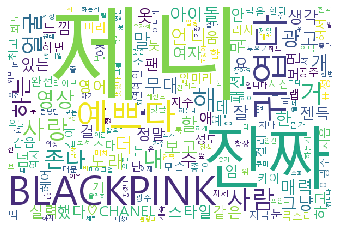

In [154]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('tot_jenny_adj_twitter.png')

In [40]:
you_je.to_csv('./magazine/final/you_je_adfn.csv', sep='|', index = False, encoding = 'utf-8')

In [155]:
tot_je.to_csv('./magazine/final/tot_je_adfn.csv', sep='|', index = False, encoding = 'utf-8')

In [46]:
jennytop200 = pd.DataFrame(word_list)

In [48]:
jennytop200.columns = ['word', 'count']

In [49]:
jennytop200

,word,count
0,제니,748
1,BLACKPINK,327
2,스타일,197
3,패션,192
4,컬러,187
...,...,...
195,지난,22
196,국제공항,22
197,뒤,21
198,준,21


In [51]:
jennytop200.to_csv('./magazine/final/jennytop200.csv', sep='|', encoding = 'utf-8', index = False)